# Imports 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'playground'))
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'data', 'price'))
from price_data import *

In [3]:
from IPython.display import Javascript

In [4]:
import playground
import price_data
from trading_bot_class import *
import requests
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import utils
import time
from matplotlib import pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Main Run

In [6]:
def total_fitness(bot,data,print_trades = False,debug_mode = False):
    """
    :param bot:
    :param data:
    :return:
    """
    for company_name,company_price,company_senti in data:
        bot.reset_attributes(1000,company_name)
        company_fit = playground.evaluate_fitness(bot, company_price, company_senti,print_trades = print_trades,debug_mode = debug_mode)
        bot.add_fitness(company_fit)
        bot.reset_attributes(1000,company_name)
    print(bot.get_fitness())
    return bot.get_fitness()

## Settings/Data 

In [7]:
NUM_GENERATIONS = 10
NUM_BOTS = 40
START_AMT = 1000.0
histPathStr = os.path.join(os.getcwd(), '..', 'data', 'twitter', 'historical.csv')
## generate 100 random bots
bots = []
data = []

# FB_price_data = price_data.get_google_finance_intraday('FB', period=600, days=70)
# fb_tweets = playground.get_company_tweets(histPathStr, '(F|f)acebook')
# data.append(('FB',FB_price_data,fb_tweets))

MSFT_price_data = price_data.get_google_finance_intraday('MSFT', period=600, days=70)
msft_tweets = playground.get_company_tweets(histPathStr, '(M|m)icrosoft')
data.append(('MSFT',MSFT_price_data,msft_tweets))

apple_price = price_data.get_google_finance_intraday('AAPL', period=600, days=70)
apple_tweets = playground.get_company_tweets(histPathStr, '(A|a)pple')
data.append(('AAPL',apple_price,apple_tweets))

TWTR_price_data = price_data.get_google_finance_intraday('TWTR', period=600, days=70)
TWTR_tweets = playground.get_company_tweets(histPathStr, '(T|t)witter')
data.append(('TWTR',TWTR_price_data,TWTR_tweets))

dell_price = price_data.get_google_finance_intraday('DVMT', period=600, days=70)
dell_tweets = playground.get_company_tweets(histPathStr, '(D|d)ell')
data.append(('DELL',dell_price,dell_tweets))

# ibm_price = price_data.get_google_finance_intraday('IBM', period=600, days=70)
# ibm_tweets = playground.get_company_tweets(histPathStr, '(IBM|Ibm)')
# data.append(('IBM',ibm_price,ibm_tweets))

/home/ubuntu/StockBot/playground/../playground/playground.py:155: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  company_tweets = data.loc[data['Texts'].str.contains(company_regex, na=False)]


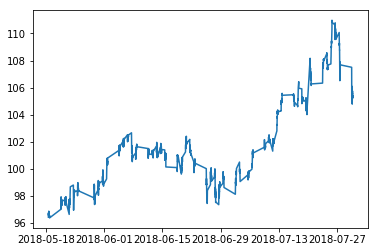

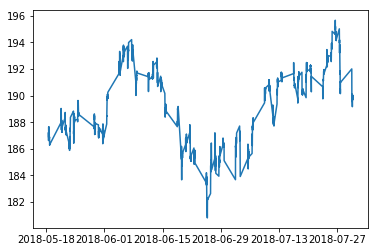

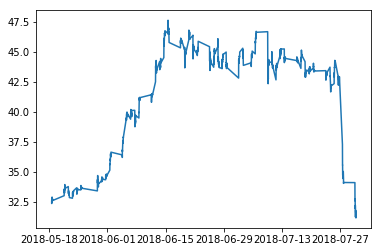

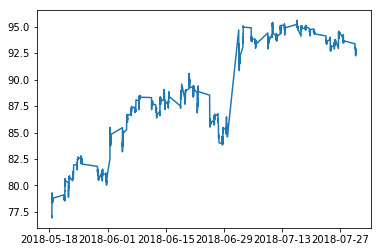

In [8]:
# plt.plot(FB_price_data['Open'])
# plt.show()
plt.plot(MSFT_price_data['Open'])
plt.show()
plt.plot(apple_price['Open'])
plt.show()
plt.plot(TWTR_price_data['Open'])
plt.show()
plt.plot(dell_price['Open'])
plt.show()
# plt.plot(ibm_price['Open'])
# plt.show()

## Generate/Reset Bots 

In [9]:
bots = []
for i in range(NUM_BOTS):
    bots.append(TradingBot(1000.0,'MSFT', utils.createDummy()))

In [10]:
for i, bot in enumerate(bots):
#     if i >= 7*len(bots)/20:
    bot.reset_attributes(1000, '', resetFitness=True)

#     bot.reset_attributes(1000, '', resetFitness=True)

In [11]:
botWeights = utils.loadGeneration()
for i, b in enumerate(bots):
    b.neural_net = botWeights[i]

In [12]:
print(len(bots))

40


In [13]:
file = open('generation_count.txt','r')
gen_count = int(file.read() or 0) or 0

In [14]:
print(gen_count)

0


##  Main

In [ ]:
for generation_index in range(NUM_GENERATIONS):
        
    startTime = time.time()
    average_fitness = []
    current_average = 0
    
    if generation_index == 0:
        for i, bot in enumerate(bots):
            current_average += total_fitness(bot,data)
            
    else:
        for i, bot in enumerate(bots):
            if i >= 7*len(bots)/20:
                current_average += total_fitness(bot,data)
            else :
                print(bot.fitness)
                current_average += bot.fitness
            
    current_average = current_average / float(NUM_BOTS)

    average_fitness.append(current_average)
    growth = (current_average - START_AMT) / START_AMT

    bitErrRate = 1.0 / (current_average)
    bots = utils.getNextGen(bots, bitErrRate)
    
    print(generation_index, 'a',current_average, '    g', growth, 'Time:', time.time() - startTime)  
    
    for i, bot in enumerate(bots):
        if i >= 7*len(bots)/20:
            bot.reset_attributes(1000, '', resetFitness=True)

utils.saveGeneration(bots, NUM_BOTS)
curgen10 = gen_count + NUM_GENERATIONS
file = open('generation_count.txt','w')
file.write(str(curgen10))


4689.718799999997
4781.538199999997
4848.605199999998
4187.8
4706.476099999999
4832.739699999998
4789.121299999998


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


4000.0
4752.985900000001
4876.458499999995
4823.602000000002
4638.732000000001
4593.668899999999
4832.612400000001
4472.0623000000005
4844.379399999995
4835.638299999999
4772.808199999998
4828.710799999999
4824.984899999996
4830.690500000001
4807.598099999999
4000.0
4849.617699999998
4834.821
4845.292999999995
4743.2609999999995
4840.116999999998
4698.4175
4839.339799999998
4832.774399999995
4668.092099999998
4703.373299999997
4764.073699999997
4703.024099999995
4876.202999999997
4828.610199999996
4678.922399999998
4842.389599999996
4819.237399999996
0 a 4723.462467499999     g 3.7234624674999988 Time: 905.3050973415375
4876.458499999995
4876.202999999997
4849.617699999998
4848.605199999998
4845.292999999995
4844.379399999995
4842.389599999996
4840.116999999998
4839.339799999998
4835.638299999999
4834.821
4832.774399999995
4832.739699999998
4832.612400000001
4743.2609999999995
4703.373299999997
4812.8971
4641.478100000002
4827.741199999998
4649.650900000001
4586.274600000001
4794.8839


In [ ]:
%%javascript

IPython.notebook.kernel.restart()
IPython.notebook.execute_all_cells()

<IPython.core.display.Javascript object>

# Testing Testing 123 

In [8]:
histPathStr = os.path.join(os.getcwd(), '..', 'data', 'twitter', 'historical.csv')


In [10]:
data_test = []
AMD_price_data = price_data.get_google_finance_intraday('AMD', period=600, days=70)
AMD_tweets = playground.get_company_tweets(histPathStr, '(AMD|amd)')
data_test.append(('AMD',AMD_price_data,AMD_tweets))

PYPL_price_data = price_data.get_google_finance_intraday('PYPL', period=600, days=70)
PYPL_tweets = playground.get_company_tweets(histPathStr, '(P|p)aypal')
data_test.append(('PYPL',PYPL_price_data,PYPL_tweets))

# apple_price = price_data.get_google_finance_intraday('AAPL', period=600, days=70)
# apple_tweets = playground.get_company_tweets(histPathStr, '(A|a)pple')
# data_test.append(('AAPL',apple_price,apple_tweets))

# ibm_price = price_data.get_google_finance_intraday('IBM', period=600, days=70)
# ibm_tweets = playground.get_company_tweets(histPathStr, '(IBM|Ibm)')
# data_test.append(('IBM',ibm_price,ibm_tweets))

# TWTR_price_data = price_data.get_google_finance_intraday('TWTR', period=600, days=70)
# TWTR_tweets = playground.get_company_tweets(histPathStr, '(T|t)witter')
# data_test.append(('TWTR',TWTR_price_data,TWTR_tweets))

# dell_price = price_data.get_google_finance_intraday('DVMT', period=600, days=70)
# dell_tweets = playground.get_company_tweets(histPathStr, '(D|d)ell')
# data_test.append(('DELL',dell_price,dell_tweets))

/home/ubuntu/StockBot/playground/../playground/playground.py:155: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  company_tweets = data.loc[data['Texts'].str.contains(company_regex, na=False)]


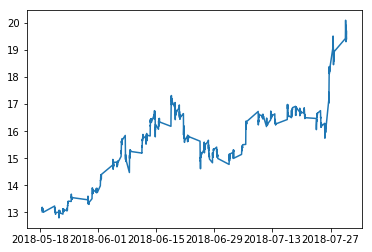

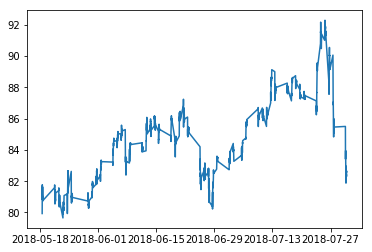

In [11]:
plt.plot(AMD_price_data['Open'])
plt.show()
plt.plot(PYPL_price_data['Open'])
plt.show()


In [57]:
best_net = keras.models.load_model(os.path.join(os.getcwd(), '..', 'playground', 'botSaves', 'bot1.h5'))
stal = TradingBot(1000,'IBM',best_net)

In [58]:
stal.reset_attributes(1000, 'FB', resetFitness=True)

Starting to trade:  AMD
[]


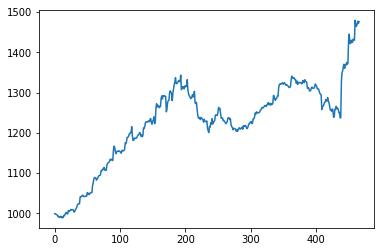

Fitness from  AMD  :  1465.7454
Starting to trade:  PYPL
[]


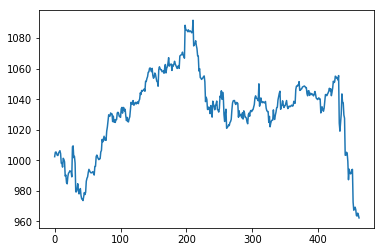

Fitness from  PYPL  :  962.341699999995
2428.087099999995


2428.087099999995

In [59]:
total_fitness(stal,data_test,print_trades = False,debug_mode = True)